## Section 0
Defined region of Hertzsprung gap and all the AGB stars within and outside of that region

In [102]:
import pandas as pd
from astroquery.gaia import Gaia

# Load the CSV file
df = pd.read_csv('post_AGB.csv', delimiter=',')

# Filter rows where the 'vickers category' column has a value of 1
filtered_df = df[(df['Vickers category'] == 1) & (df['parallax'] >= 0.1)]

# Extract the Gaia source IDs
gaia_ids = filtered_df['Gaia source id'].tolist()

# List to store individual query results
results_list = []

# Loop through each Gaia ID and perform the query
for gaia_id in gaia_ids:
    gaia_id_str = str(gaia_id)
    query = f"""
    SELECT 
        source_id, 
        parallax,
        phot_g_mean_mag + 5 * LOG10(parallax) - 10 - ag_gspphot AS mg,
        ag_gspphot,
        phot_rp_mean_mag AS mr, 
        bp_rp - ebpminrp_gspphot AS bp_rp, 
        ebpminrp_gspphot,
        phot_bp_mean_mag AS mb,
        rv_template_fe_h AS feh
    FROM gaiadr3.gaia_source 
    WHERE source_id = {gaia_id_str}
    """
    job = Gaia.launch_job(query)
    result = job.get_results()
    results_list.append(result.to_pandas())

# Concatenate all results into a single DataFrame
final_df = pd.concat(results_list, ignore_index=True)

# # Rename columns to match the format expected in the filter function
# final_df.rename(columns={'mg': 'G'}, inplace=True)

# Filter the data to only consider regions within the defined lines
def filter_by_lines(df):
    line1 = (21 / 128 + 0.08) * df['mg'] + 149 / 386
    line2 = (-7 / 124 + 0.04) * df['mg'] + 603 / 620
    inside = df[(df['bp_rp'] <= line2) & (df['bp_rp'] >= line1) & (df['mg'] <= 0)]
    outside = df[~((df['bp_rp'] <= line2) & (df['bp_rp'] >= line1) & (df['mg'] <= 0))]
    return inside, outside

# Apply the filter
inside_df, outside_df = filter_by_lines(final_df)

# Save the filtered data to a new CSV file
inside_df.to_csv('post-AGB_inside_region.csv', index=False)
outside_df.to_csv('post-AGB_outside_region.csv', index=False)

print("Data has been successfully filtered and saved to 'post-AGB_inside_region.csv' and 'post-AGB_outside_region.csv'")

Data has been successfully filtered and saved to 'post-AGB_inside_region.csv' and 'post-AGB_outside_region.csv'


In [103]:
inside_df

,SOURCE_ID,parallax,mg,ag_gspphot,mr,bp_rp,ebpminrp_gspphot,mb,feh
0,565507868441719424,0.241416,-3.380365,1.2553,10.658106,-0.344984,0.6830,10.996122,-5.00
7,3336558507975208448,1.037998,-0.519119,0.8664,9.596304,0.702038,0.4666,10.764942,0.00
8,994259335315643520,0.267760,-4.409398,0.4017,8.372946,0.548565,0.2171,9.138611,-1.50
15,5545800762036628736,0.258240,-3.840561,1.9992,10.154995,0.539515,1.1055,11.800010,-1.00
21,5335709477519159936,0.169155,-3.541320,2.0446,11.725273,-0.251208,1.1166,12.590665,NaN
23,5335675087769798272,0.185354,-4.646739,2.3904,10.479761,0.189419,1.3245,11.993680,0.25
24,3589047952995134720,0.110189,-2.706744,0.0013,11.504764,0.924363,0.0007,12.429827,-2.00
30,3497154104039422848,0.566965,-5.162435,0.5513,6.038276,0.673880,0.2966,7.008756,-0.75
34,6083719439934104832,0.177038,-3.239901,0.1607,10.263178,0.572922,0.0871,10.923200,-1.50
40,5849958457496943744,0.350806,-1.703962,0.7062,10.281139,0.549145,0.3875,11.217784,NaN


In [34]:
%cd "/home/dutta/Downloads/Summer'24/MIST_codes/scripts"
import read_mist_models

/home/dutta/Downloads/Summer'24/MIST_codes/scripts


In [88]:
%cd "/home/dutta/Downloads/post-AGB"

/home/dutta/Downloads/post-AGB


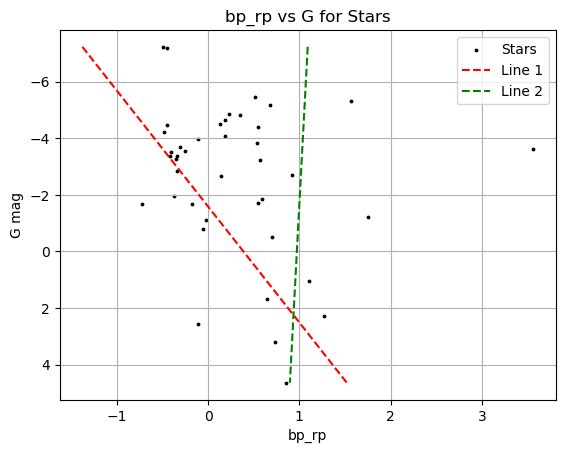

In [101]:
import matplotlib.pyplot as plt
import read_mist_models
import numpy as np
import os
import glob

# # Plot MIST tracks (assuming eep_cmd_file is the path to your MIST track file)
# # Step 1: Change directory to the folder containing .eep.cmd files
# os.chdir('.')  # Update this to your directory path

# # Step 2: Find all .eep.cmd files
# eep_cmd_files = glob.glob('*.eep.cmd')
# eep_cmd_files.sort()
# eep_cmd_files = eep_cmd_files[:20]

# # Plotting the bp_rp vs G for stars
# plt.figure(figsize=(10, 8))

# # Function to plot the MIST tracks
# for eep_cmd_file in eep_cmd_files:
#     eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
#     A = eepcmd.eepcmds['star_age']
#     T = eepcmd.eepcmds['log_Teff']
#     L = eepcmd.eepcmds['log_L']
#     B = eepcmd.eepcmds['Gaia_BP_EDR3']
#     R = eepcmd.eepcmds['Gaia_RP_EDR3']
#     G = eepcmd.eepcmds['Gaia_G_EDR3']
#     P = eepcmd.eepcmds['phase']
#     # plt.scatter(B - R, G, s=2, color='blue', alpha=0.7)
    
#     # Filter the data to include only some ages years
#     mask = (P == 6)
#     A_filtered = A[mask]
#     B_filtered = B[mask]
#     R_filtered = R[mask]
#     G_filtered = G[mask]
    
#     plt.scatter(B_filtered - R_filtered, G_filtered, s=2, color='blue', alpha=0.7)

# Plot the data points from your filtered_df or wherever you have them
# plt.scatter(inside_df['bp_rp'], inside_df['mg'], s=3, marker='o', color='black', label='Stars')
plt.scatter(final_df['bp_rp'], final_df['mg'], s=3, marker='o', color='black', label='Stars')

# Plot the two lines (assuming hypothetical values here)
# line1_bp_rp = np.linspace(inside_df['mg'].min()-2, inside_df['mg'].max(), 100)
line1_G = np.linspace(final_df['mg'].min(), final_df['mg'].max(), 100)
line1_bp_rp = (21 / 128 + 0.08) * line1_G + 149 / 386
plt.plot(line1_bp_rp, line1_G, linestyle='--', color='red', label='Line 1')

# line2_bp_rp = np.linspace(inside_df['mg'].min()-2, inside_df['mg'].max(), 100)
line2_G = np.linspace(final_df['mg'].min(), final_df['mg'].max(), 100)
line2_bp_rp = (-7 / 124 + 0.04) * line2_G + 603 / 620
plt.plot(line2_bp_rp, line2_G, linestyle='--', color='green', label='Line 2')

# Add labels and legend
plt.xlabel('bp_rp')
plt.ylabel('G mag')
plt.title('bp_rp vs G for Stars')
plt.legend()

# Show plot
plt.gca().invert_yaxis()
plt.legend()
plt.grid(True)
plt.show()

## Section 1
Going for all post-AGB stars

In [309]:
import json

# Load the data from the JSON files
# with open('cleaned_results1.json', 'r') as f1, open('source_calib_info_combined.txt', 'r') as f2:
with open('cleaned_results2.json', 'r') as f1, open('pAGB_source_calib_info.txt', 'r') as f2:
    file1_data = json.load(f1)
    file2_data = json.load(f2)

# Iterate over each GAIA ID in the first file
for gaia_id, plates in file1_data.items():
    # Lists to track indices to remove for plate_1 and plate_2
    to_remove_indices = []

    # Iterate through the plates to check for matches and track removals
    for i, plate in enumerate(plates):
        source_id_1 = plate.get('source_id_1')
        source_id_2 = plate.get('source_id_2')

        match_1 = str(source_id_1) in file2_data
        match_2 = str(source_id_2) in file2_data

        if match_1 and match_2:
            # Update the entries with natmag and natmag_error
            gaia_data_1 = file2_data[str(source_id_1)]
            plate['natmag_1'] = gaia_data_1['natmag']
            plate['natmag_error_1'] = gaia_data_1['natmag_error']
            
            gaia_data_2 = file2_data[str(source_id_2)]
            plate['natmag_2'] = gaia_data_2['natmag']
            plate['natmag_error_2'] = gaia_data_2['natmag_error']
        else:
            to_remove_indices.append(i)

    # Remove entries starting from the highest index to avoid shifting issues
    for index in reversed(to_remove_indices):
        del plates[index]

# Save the updated data back to a JSON file
# with open('color_natmag_cross1.json', 'w') as f:
with open('color_natmag_cross11.json', 'w') as f:
    json.dump(file1_data, f, indent=4)

In [310]:
import json
from datetime import datetime
from math import sqrt

# Step 1: Define the Date Range
start_date = datetime(1930, 1, 1)
end_date = datetime(1999, 12, 31)

# Step 2: Function to Calculate RMS Error
def calculate_rms_error(errors):
    # Calculate Root Mean Square (RMS) error
    n = len(errors)
    if n == 0:
        return None
    sum_sq = sum(err ** 2 for err in errors)
    rms_error = sqrt(sum_sq / n)
    return rms_error

# Step 3: Load and Process JSON Data
# with open('color_natmag_cross1.json', 'r') as f:
with open('color_natmag_cross11.json', 'r') as f:
    data = json.load(f)

best_data = {}

# Step 4: Process Each GAIA Id
for gaia_id, observations in data.items():
    best_observation = None
    lowest_rms_error = float('inf')  # Start with a very large number
    
    for observation in observations:
        date_orig_1 = datetime.strptime(observation['date_orig_1'], '%Y-%m-%d')
        
        if start_date <= date_orig_1 <= end_date:
            if 0.25 <= abs(observation['color_term_1'] - observation['color_term_2']) <= 5.0 and observation['color_term_error_1'] <= 0.25 and observation['color_term_error_2'] <= 0.25:
                if abs(observation['natmag_1'] - observation['natmag_2']) >= 0.5:
                    # Calculate RMS error for this observation
                    errors = [
                        observation['color_term_error_1'],
                        observation['color_term_error_2'],
                        observation['natmag_error_1'],
                        observation['natmag_error_2']
                    ]
                    rms_error = calculate_rms_error(errors)
                    
                    if rms_error is not None and rms_error < lowest_rms_error:
                        lowest_rms_error = rms_error
                        best_observation = observation
    
    if best_observation is not None:
        best_data[gaia_id] = [best_observation]

# Step 5: Output the Result to JSON File
# with open('color_natmag_cross2.json', 'w') as outfile:
with open('color_natmag_cross21.json', 'w') as outfile:
    json.dump(best_data, outfile, indent=4)

In [467]:
from astroquery.gaia import Gaia
import json

# Load the final JSON file
with open('color_natmag_cross11.json', 'r') as f:
    final_data = json.load(f)

# Open a text file to write B and V magnitudes with errors
with open('GAIA_Bp_Rp.txt', 'w') as f:
    # Write header
    f.write("GAIA_ID\tBmag\tRmag\tGmag\tbp_rp\tepoch\tparallax\tazero_gspphot\tag_gspphot\tebpminrp_gspphot\n")

    for gaia_id, plates_data in final_data.items():
        # Get the GAIA ID
        gaia_id_str = str(gaia_id)

        # Query GAIA for B and V magnitudes
        # query = f"""
        # SELECT 
        #     source_id, 
        #     parallax,
        #     phot_g_mean_mag + 5 * LOG10(parallax) - 10 AS mg, 
        #     phot_rp_mean_mag AS mr, 
        #     bp_rp, 
        #     phot_bp_mean_mag AS mb 
        # FROM gaiadr3.gaia_source 
        # WHERE source_id = {gaia_id_str};
        # """
        query = f"""
        SELECT 
            source_id, 
            parallax,
            ref_epoch,
            phot_g_mean_mag + 5 * LOG10(parallax) - 10 AS mg,
            ag_gspphot,
            azero_gspphot,
            phot_rp_mean_mag AS mr, 
            bp_rp, 
            ebpminrp_gspphot,
            phot_bp_mean_mag AS mb,
            rv_template_fe_h AS feh
        FROM gaiadr3.gaia_source 
        WHERE source_id = {gaia_id_str}
        -- AND phot_variable_flag = 'NOT_AVAILABLE';
        """
        job = Gaia.launch_job(query)
        result = job.get_results()

        if len(result) > 0:
            # Get B magnitude and error
            Bmag = result['mb'][0]
            Gmag = result['mg'][0]
            # Get V magnitude and error
            Rmag = result['mr'][0]
            Bp_Rp = result['bp_rp'][0]
            epoch = result['ref_epoch'][0]
            parallax = result['parallax'][0]
            ag_gspphot = result['ag_gspphot'][0]
            azero_gspphot = result['azero_gspphot'][0]
            ebpminrp_gspphot = result['ebpminrp_gspphot'][0]

            # Write to file
            f.write(f"{gaia_id_str}\t{Bmag:.3f}\t{Rmag:.3f}\t{Gmag:.3f}\t{Bp_Rp:.3f}\t{epoch}\t{parallax:.3f}\t{azero_gspphot:.3f}\t{ag_gspphot:.3f}\t{ebpminrp_gspphot:.3f}\n")
        else:
            # Write NA if no data found
            f.write(f"{gaia_id_str}\tNA\tNA\tNA\tNA\tNA\tNA\tNA\tNA\tNAn")

print("B and V magnitudes saved to GAIA_Bp_Rp.txt")

/tmp/ipykernel_847415/3377907522.py:63: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  f.write(f"{gaia_id_str}\t{Bmag:.3f}\t{Rmag:.3f}\t{Gmag:.3f}\t{Bp_Rp:.3f}\t{epoch}\t{parallax:.3f}\t{azero_gspphot:.3f}\t{ag_gspphot:.3f}\t{ebpminrp_gspphot:.3f}\n")


B and V magnitudes saved to GAIA_Bp_Rp.txt


In [455]:
import numpy as np

# Initialize an empty list to store parallax values
parallax_values = []

# Open the text file and read its contents
with open('GAIA_Bp_Rp.txt', 'r') as f:
    # Skip the header line
    next(f)
    
    # Iterate through each line in the file
    for line in f:
        # Split the line into columns
        columns = line.strip().split('\t')
        
        # Check if the parallax column is not 'NA' and convert to float
        parallax_str = columns[5]
        if parallax_str != 'NA':
            parallax_values.append(float(parallax_str))

# Convert the list to a numpy array
parallax_array = np.array(parallax_values)

# Print the array
print(parallax_array)

[0.53  0.686 0.381 1.577 0.239 0.79  0.205 0.237 0.077]


In [456]:
import json
import numpy as np

# Custom JSON Encoder to handle numpy data types
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NumpyEncoder, self).default(obj)

# Load the JSON file
with open('color_natmag_cross11.json', 'r') as f:
    data = json.load(f)

# Read the GAIA_Bp_Rp.txt file and store the parallax values in a dictionary
parallax_dict = {}

with open('GAIA_Bp_Rp.txt', 'r') as f:
    # Skip the header line
    next(f)
    for line in f:
        columns = line.strip().split('\t')
        gaia_id = columns[0]
        parallax = columns[5]
        if parallax != 'NA':
            parallax_dict[gaia_id] = float(parallax)

# Function to solve for B and V
def solve_for_B_V(natmag_1, color_1, natmag_2, color_2):
    # Create the coefficient matrix and the constants vector
    A = np.array([[1 + color_1, -color_1],
                  [1 + color_2, -color_2]])
    C = np.array([natmag_1, natmag_2])
    
    try:
        # Solve the system of linear equations
        B, V = np.linalg.solve(A, C)
    except np.linalg.LinAlgError:
        # Handle singular matrix case
        return None, None
    return B, V

# Iterate over each GAIA ID and solve for B and V
results = {}
for gaia_id, plate_list in data.items():
    for plates in plate_list:
        natmag_1 = plates.get('natmag_1')
        color_term_1 = plates.get('color_term_1')
        natmag_2 = plates.get('natmag_2')
        color_term_2 = plates.get('color_term_2')

        if all(x is not None for x in [natmag_1, color_term_1, natmag_2, color_term_2]):
            B, V = solve_for_B_V(natmag_1, color_term_1, natmag_2, color_term_2)

            if B is not None and V is not None:
                # Adjust B and V using the parallax value from the GAIA_Bp_Rp.txt file
                parallax = parallax_dict.get(str(gaia_id))
                if parallax:
                    B_adj = B + 5 * np.log10(parallax) - 10
                    V_adj = V + 5 * np.log10(parallax) - 10

                    results[gaia_id] = {
                        'B': B_adj,
                        'V': V_adj,
                        'plate_1': {k: v for k, v in plates.items() if k.endswith('_1')},
                        'plate_2': {k: v for k, v in plates.items() if k.endswith('_2')}
                    }

# Save the results to a new JSON file
with open('color_natmag_cross3.json', 'w') as f:
    json.dump(results, f, indent=4, ensure_ascii=False, cls=NumpyEncoder)

print("B and V values calculated and saved to 'color_natmag_cross3.json'.")

B and V values calculated and saved to 'color_natmag_cross3.json'.


In [494]:
import json
import csv
from datetime import datetime
import math
import numpy as np

# Load the CSV file and create a dictionary mapping plate IDs to dates
plate_date_map = {}
with open('combined.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        plate_id = int(row['plate_id'])
        date_orig = datetime.strptime(row['date_orig'], '%Y-%m-%d')
        plate_date_map[plate_id] = date_orig

# Load the JSON file
with open('color_natmag_cross11.json', 'r') as f:
    file1_data = json.load(f)

# Function to check for NaN or null values
def is_invalid_entry(entry, natmag_key, natmag_error_key):
    natmag = entry.get(natmag_key)
    natmag_error = entry.get(natmag_error_key)
    if natmag is None or natmag_error is None:
        return True
    if isinstance(natmag, float) and math.isnan(natmag):
        return True
    if isinstance(natmag_error, float) and math.isnan(natmag_error):
        return True
    return False

# Preprocess to remove entries with NaN or null values in pairs
def preprocess_data(data):
    for gaia_id, plates in data.items():
        to_remove = []

        for i, entry in enumerate(plates):
            if is_invalid_entry(entry, 'natmag_1', 'natmag_error_1') or is_invalid_entry(entry, 'natmag_2', 'natmag_error_2'):
                to_remove.append(i)

        for index in sorted(to_remove, reverse=True):
            del plates[index]

    return data

# Preprocess the data
file1_data = preprocess_data(file1_data)

# Define the date range
start_date = datetime(1880, 1, 1)
end_date = datetime(1999, 12, 31)

# Function to filter plates by date
def filter_plates_by_date(plates, plate_date_map, start_date, end_date):
    filtered_plates = []
    for plate in plates:
        plate_id_1 = plate.get('plate_id_1')
        plate_id_2 = plate.get('plate_id_2')
        
        if plate_id_1 in plate_date_map and plate_id_2 in plate_date_map:
            date_orig_1 = plate_date_map[plate_id_1]
            date_orig_2 = plate_date_map[plate_id_2]
            
            # Check if dates are within the specified range
            if start_date <= date_orig_1 <= end_date and start_date <= date_orig_2 <= end_date:
                days_gap = abs((date_orig_2 - date_orig_1).days)
                # Check if the total gap is less than 120 days
                if days_gap < 120:
                    plate['date_orig_1'] = date_orig_1.strftime('%Y-%m-%d')
                    plate['date_orig_2'] = date_orig_2.strftime('%Y-%m-%d')
                    plate['days_gap'] = days_gap
                    filtered_plates.append(plate)
    
    return filtered_plates

# Function to solve for B and V
def solve_for_B_V(natmag_1, color_1, natmag_2, color_2):
    # Create the coefficient matrix and the constants vector
    A = np.array([[1 + color_1, -color_1],
                  [1 + color_2, -color_2]])
    C = np.array([natmag_1, natmag_2])
    
    try:
        # Solve the system of linear equations
        B, V = np.linalg.solve(A, C)
    except np.linalg.LinAlgError:
        # Handle singular matrix case
        return None, None
    return B, V

# List of GAIA IDs to process
gaia_ids_to_process = ['2060806470651334912', '2006425553228658816', '513671461473684352', '2030200671149815424', '2168803045330976768', '2030200671149815424', '3108327343185135872', '2034134414507432064', '2015785313459952128', '1328057763997734144']  # Add more GAIA IDs as needed
# gaia_ids_to_process = ['513671461473684352']  # Add more GAIA IDs as needed

results = {}
for gaia_id_to_process in gaia_ids_to_process:
    if gaia_id_to_process in file1_data:
        plates = file1_data[gaia_id_to_process]
        plates = filter_plates_by_date(plates, plate_date_map, start_date, end_date)
        
        # Remove GAIA IDs with zero entries
        if plates:
            filtered_data = {gaia_id_to_process: plates}
            
            # Iterate over each GAIA ID and solve for B and V
            for gaia_id, plates in filtered_data.items():
                for plate in plates:
                    natmag_1 = plate['natmag_1']
                    color_term_1 = plate['color_term_1']
                    color_term_error_1 = plate['color_term_error_1']
                    natmag_2 = plate['natmag_2']
                    color_term_2 = plate['color_term_2']
                    color_term_error_2 = plate['color_term_error_2']

                    # Ensure the difference in color terms
                    if np.abs(color_term_1 - color_term_2) > 2 * (color_term_error_1 + color_term_error_2):
                        B, V = solve_for_B_V(natmag_1, color_term_1, natmag_2, color_term_2)

                        if B is not None and V is not None:
                            if gaia_id not in results:
                                results[gaia_id] = []
                            plate_data = {
                                'B': B,
                                'V': V,
                                'source_id_1': plate['source_id_1'],
                                'plate_id_1': plate['plate_id_1'],
                                'date_orig_1': plate['date_orig_1'],
                                'emulsion_1': plate['emulsion_1'],
                                'source_id_2': plate['source_id_2'],
                                'plate_id_2': plate['plate_id_2'],
                                'date_orig_2': plate['date_orig_2'],
                                'emulsion_2': plate['emulsion_2'],
                                'days_gap': plate['days_gap'],
                                'color_term_1': color_term_1,
                                'color_term_error_1': plate['color_term_error_1'],
                                'gmag_1': plate.get('gmag_1', 'NaN'),
                                'bp_rp_1': plate.get('bp_rp_1', 'NaN'),
                                'color_term_2': color_term_2,
                                'color_term_error_2': plate['color_term_error_2'],
                                'gmag_2': plate.get('gmag_2', 'NaN'),
                                'bp_rp_2': plate.get('bp_rp_2', 'NaN'),
                                'natmag_1': natmag_1,
                                'natmag_error_1': plate['natmag_error_1'],
                                'natmag_2': natmag_2,
                                'natmag_error_2': plate['natmag_error_2']
                            }
                            results[gaia_id].append(plate_data)

# Save the results to a new JSON file
with open('one.json', 'w') as f:
    json.dump(results, f, indent=4)

print("B and V values calculated and saved to 'one.json'.")

B and V values calculated and saved to 'one.json'.


In [495]:
import json
from datetime import datetime

# Load the previous results
with open('one.json', 'r') as f:
    data = json.load(f)

# Load the plate_date_map from the CSV file
plate_date_map = {}
with open('combined.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        plate_id = int(row['plate_id'])
        date_orig = datetime.strptime(row['date_orig'], '%Y-%m-%d')
        plate_date_map[plate_id] = date_orig

# Function to calculate the average date and add it to the entry
def add_dates_and_average_time(entry):
    plate_id_1 = entry['plate_id_1']
    plate_id_2 = entry['plate_id_2']

    date_1 = plate_date_map.get(plate_id_1)
    date_2 = plate_date_map.get(plate_id_2)
    
    if date_1 and date_2:
        average_date = date_1 + (date_2 - date_1) / 2
    else:
        average_date = None

    entry['date_orig_1'] = date_1.strftime('%Y-%m-%d') if date_1 else None
    entry['date_orig_2'] = date_2.strftime('%Y-%m-%d') if date_2 else None
    entry['average_date'] = average_date.strftime('%Y-%m-%d') if average_date else None

    return entry

# Process each GAIA ID and add dates and average time
for gaia_id, entries in data.items():
    for entry in entries:
        add_dates_and_average_time(entry)

# Save the updated results to a new JSON file
with open('color_natmag_cross4.json', 'w') as f:
    json.dump(data, f, indent=4)

print("Dates and average times added, and data saved to 'color_natmag_cross4.json'.")

Dates and average times added, and data saved to 'color_natmag_cross4.json'.


A trial for estimating G passband

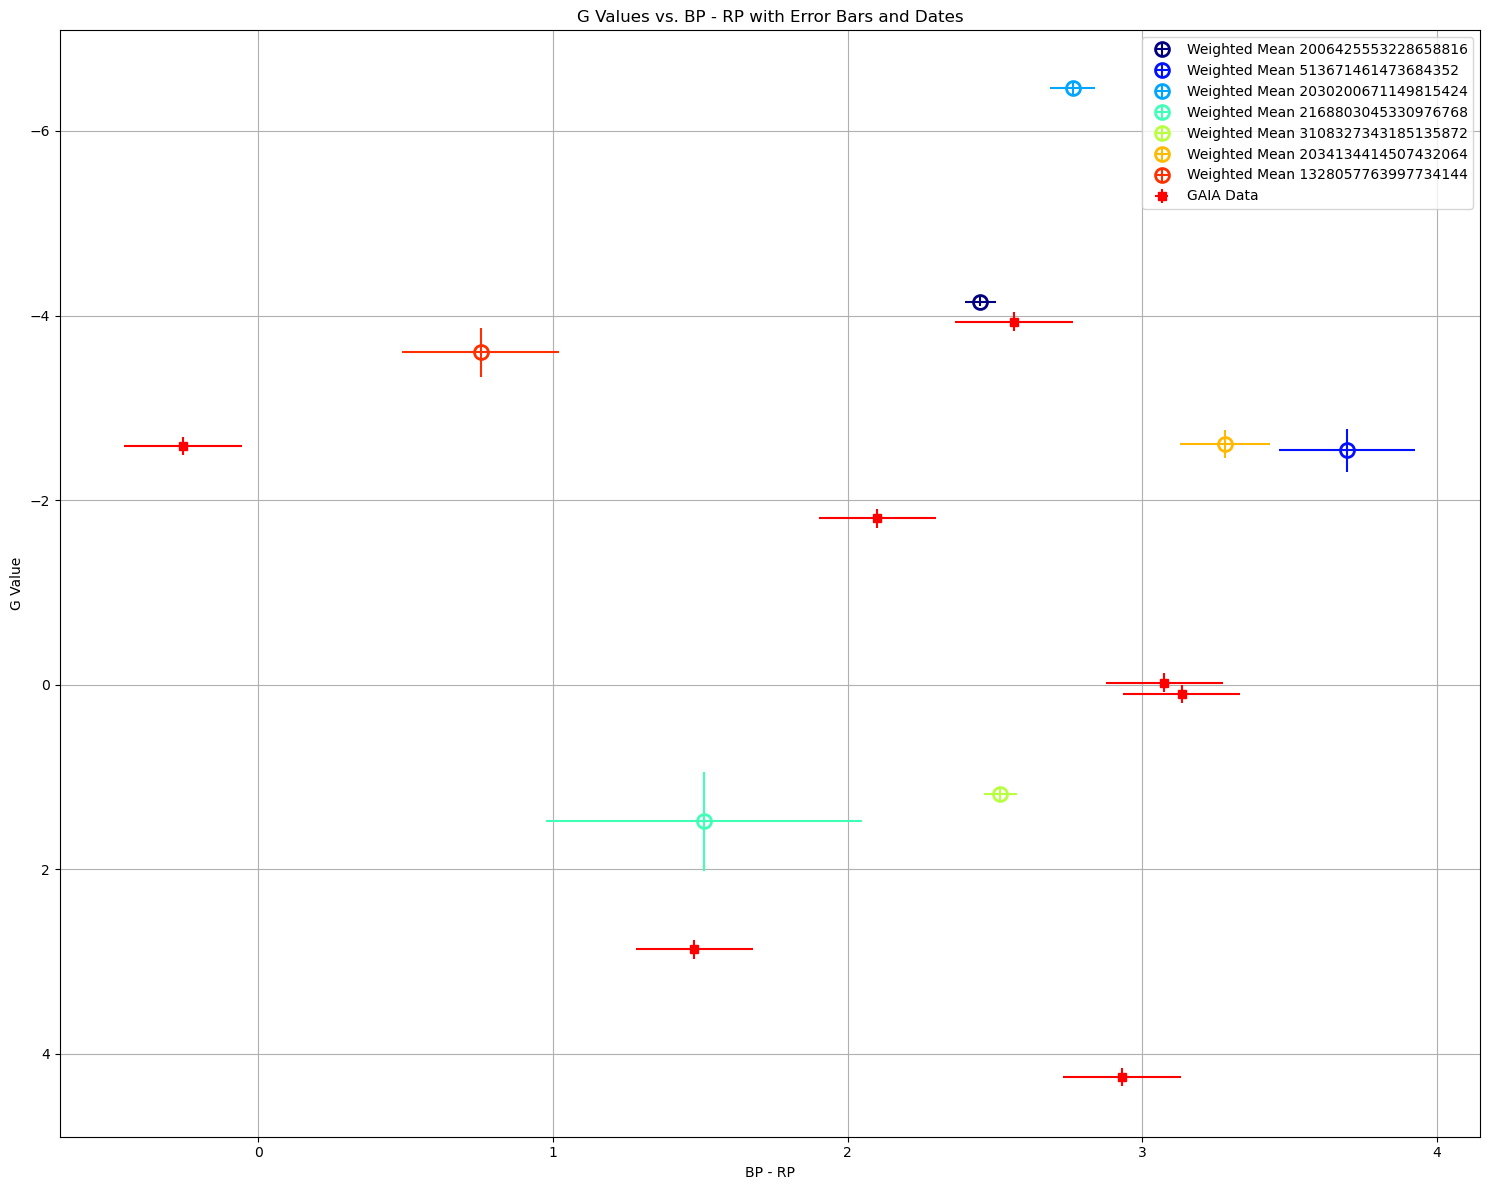

In [496]:
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

# Function to read GAIA data
def read_gaia_data(file_path, gaia_id):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        for line in lines[1:]:
            columns = line.strip().split()
            if columns[0] == str(gaia_id):
                bp_rp = float(columns[4])
                Bmag = float(columns[1])
                Rmag = float(columns[2])
                parallax = float(columns[-4])
                return bp_rp, Bmag, Rmag, parallax
    raise ValueError("GAIA ID not found in the file")

# Function to convert BP and RP to G using Gaia DR3 transformation
def bp_rp_mod(BP, RP, parallax):
    if parallax is not None:
        BP_RP = BP - RP
        G = BP + 0.02 * BP_RP
        return G + 5 * np.log10(parallax) - 10
    else:
        raise ValueError("Parallax not found")

# Function to read JSON file and extract data
def extract_data(json_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    
    BP_values = defaultdict(list)
    RP_values = defaultdict(list)
    average_dates = defaultdict(list)
    max_natmag_errors = defaultdict(list)
    max_color_term_errors = defaultdict(list)
    gaia_ids = list(data.keys())

    for gaia_id, entries in data.items():
        for entry in entries:
            BP = entry['B']
            RP = entry['V']
            BP_values[gaia_id].append(BP)
            RP_values[gaia_id].append(RP)
            
            average_date_str = entry['average_date']
            if average_date_str:
                average_date = datetime.strptime(average_date_str, '%Y-%m-%d')
                average_dates[gaia_id].append(average_date)
                
                natmag_error_1 = entry['natmag_error_1']
                natmag_error_2 = entry['natmag_error_2']
                color_term_error_1 = entry['color_term_error_1']
                color_term_error_2 = entry['color_term_error_2']
                
                max_natmag_error = np.sqrt(natmag_error_1**2 + natmag_error_2**2)
                max_color_term_error = np.sqrt(color_term_error_1**2 + color_term_error_2**2)
                
                max_natmag_errors[gaia_id].append(max_natmag_error)
                max_color_term_errors[gaia_id].append(max_color_term_error)
    
    return BP_values, RP_values, average_dates, max_natmag_errors, max_color_term_errors, gaia_ids

# Function to read parallax from GAIA_Bp_Rp.txt file
def get_parallax(gaia_ids):
    parallax_map = {}
    file_path = 'GAIA_Bp_Rp.txt'  # Replace with the path to your file
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        # Skip the header
        for line in lines[1:]:
            columns = line.strip().split()
            gaia_id = columns[0]
            parallax = float(columns[-4])
            parallax_map[gaia_id] = parallax

    return [parallax_map.get(gaia_id, None) for gaia_id in gaia_ids]

# Function to calculate weighted mean and error
def weighted_mean(values, errors):
    weights = 1 / np.square(errors)
    mean = np.sum(values * weights) / np.sum(weights)
    error = np.sqrt(1 / np.sum(weights))
    return mean, error

# Load data from JSON file
json_file_path = 'color_natmag_cross4.json'
BP_values, RP_values, average_dates, max_natmag_errors, max_color_term_errors, gaia_ids = extract_data(json_file_path)

# Plot the data with error bars
plt.figure(figsize=(15, 12))
colors = plt.cm.jet(np.linspace(0, 1, len(gaia_ids) + 1))  # One extra color for GAIA

# Get parallaxes for all GAIA IDs
parallaxes = get_parallax(gaia_ids)

for idx, gaia_id in enumerate(gaia_ids):
    BP_vals = np.array(BP_values[gaia_id])
    RP_vals = np.array(RP_values[gaia_id])
    dates = np.array(average_dates[gaia_id])
    natmag_errors = np.array(max_natmag_errors[gaia_id])
    color_term_errors = np.array(max_color_term_errors[gaia_id])
    errors = np.sqrt(color_term_errors**2 + natmag_errors**2)

    G_vals = []
    for i in range(len(BP_vals)):
        G_val = bp_rp_mod(BP_vals[i], RP_vals[i], parallaxes[idx])
        G_vals.append(G_val)
    
    G_vals = np.array(G_vals)
    BP_minus_RP_vals = BP_vals - RP_vals

    # Sort by dates
    sorted_indices = np.argsort(dates)
    BP_minus_RP_sorted = BP_minus_RP_vals[sorted_indices]
    G_sorted = G_vals[sorted_indices]
    dates_sorted = dates[sorted_indices]
    errors_sorted = errors[sorted_indices]

    # plt.errorbar(BP_minus_RP_sorted, G_sorted, xerr=errors_sorted, yerr=errors_sorted, fmt='s', ecolor=colors[idx], capthick=2, label=f'GAIA ID {gaia_id}', color=colors[idx])

    # # Annotate points with their average dates
    # for i, date in enumerate(dates_sorted):
    #     plt.annotate(date.strftime('%Y-%m-%d'), (BP_minus_RP_sorted[i], G_sorted[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

    # Calculate and plot the weighted mean
    if len(G_vals) > 0:
        mean_BP_minus_RP, mean_BP_minus_RP_error = weighted_mean(BP_minus_RP_vals, errors)
        mean_G, mean_G_error = weighted_mean(G_vals, errors)
        plt.errorbar(mean_BP_minus_RP, mean_G, xerr=mean_BP_minus_RP_error, yerr=mean_G_error, fmt='o', color=colors[idx], markersize=10, label=f'Weighted Mean {gaia_id}', markerfacecolor='none', markeredgewidth=2)

# Read GAIA data
gaia_file_path = 'GAIA_Bp_Rp.txt'
gaia_data = []
for gaia_id in gaia_ids:
    try:
        gaia_bp_rp, gaia_b, gaia_r, gaia_parallax = read_gaia_data(gaia_file_path, gaia_id)
        gaia_g = bp_rp_mod(gaia_b, gaia_r, gaia_parallax)
        gaia_data.append((gaia_bp_rp, gaia_g))
    except ValueError:
        continue

# Plot GAIA data
gaia_bp_rp_values, gaia_g_values = zip(*gaia_data)
gaia_dates = [2016] * len(gaia_bp_rp_values)
gaia_bp_rp_errors = [0.2] * len(gaia_bp_rp_values)
gaia_g_errors = [0.1] * len(gaia_g_values)

plt.errorbar(gaia_bp_rp_values, gaia_g_values, xerr=gaia_bp_rp_errors, yerr=gaia_g_errors, fmt='s', ecolor='red', capthick=2, label='GAIA Data', color='red')

# Formatting the plot
plt.gca().invert_yaxis()
plt.xlabel('BP - RP')
plt.ylabel('G Value')
plt.title('G Values vs. BP - RP with Error Bars and Dates')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot to a file
# plt.savefig('G_values_vs_BP_minus_RP.png')

# Show the plot
plt.show()

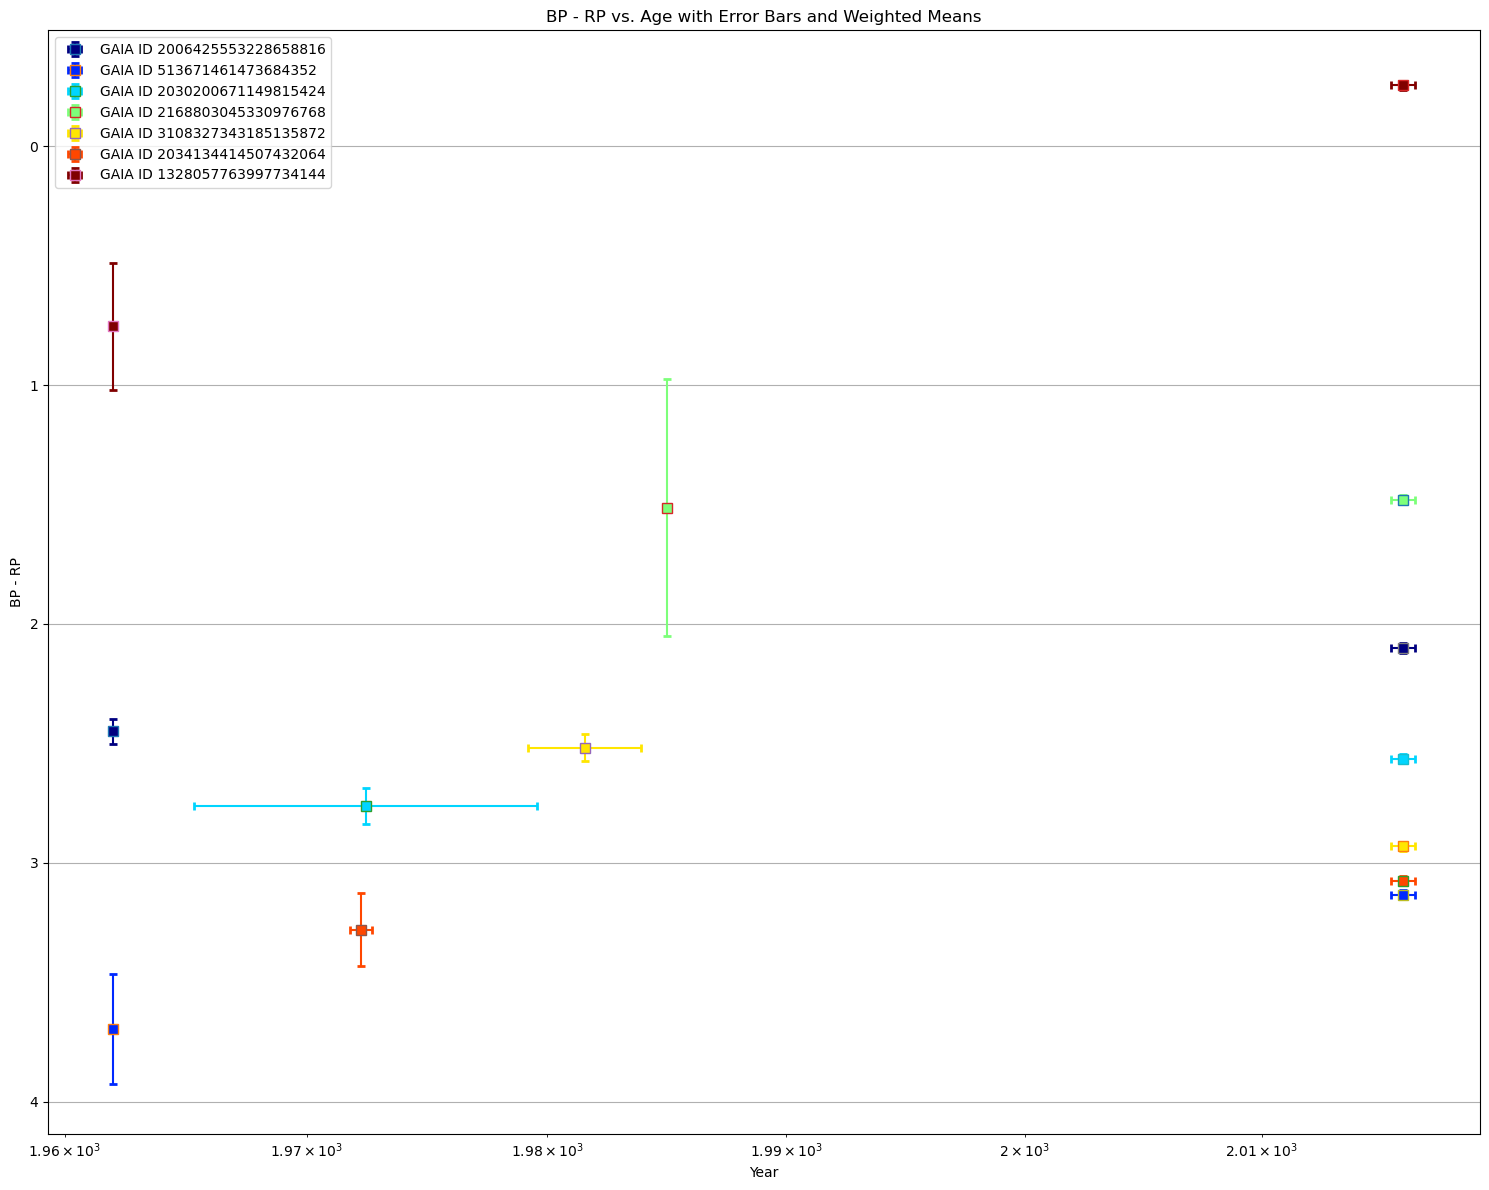

In [497]:
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict
import matplotlib.cm as cm

# Function to read GAIA data
def read_gaia_data(file_path, gaia_id_to_process):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        for line in lines[1:]:
            columns = line.strip().split()
            if columns[0] == str(gaia_id_to_process):
                bp_rp = float(columns[4])
                Bmag = float(columns[1])
                Rmag = float(columns[2])
                return bp_rp, Bmag, Rmag
    raise ValueError("GAIA ID not found in the file")

# Function to calculate weighted mean and error
def weighted_mean(values, errors):
    weights = 1 / np.square(errors)
    mean = np.sum(values * weights) / np.sum(weights)
    error = np.sqrt(1 / np.sum(weights))
    return mean, error

# Function to read JSON file and extract data
def extract_data(json_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    
    BP_values = []
    RP_values = []
    ages = []
    max_natmag_errors = []
    max_color_term_errors = []
    gaia_ids = []
    
    for gaia_id, entries in data.items():
        for entry in entries:
            BP = entry['B']
            RP = entry['V']
            BP_values.append(BP)
            RP_values.append(RP)
            gaia_ids.append(gaia_id)
            
            date_str = entry['average_date']
            if date_str:
                age = datetime.strptime(date_str, '%Y-%m-%d').year
                ages.append(age)
                
                natmag_error_1 = entry['natmag_error_1']
                natmag_error_2 = entry['natmag_error_2']
                color_term_error_1 = entry['color_term_error_1']
                color_term_error_2 = entry['color_term_error_2']
                
                max_natmag_error = np.sqrt(natmag_error_1**2 + natmag_error_2**2)
                max_color_term_error = np.sqrt(color_term_error_1**2 + color_term_error_2**2)
                
                max_natmag_errors.append(max_natmag_error)
                max_color_term_errors.append(max_color_term_error)
    
    return np.array(BP_values), np.array(RP_values), np.array(ages), np.array(max_natmag_errors), np.array(max_color_term_errors), gaia_ids

# Load data from JSON file
json_file_path = 'color_natmag_cross4.json'
BP_values, RP_values, ages, max_natmag_errors, max_color_term_errors, gaia_ids = extract_data(json_file_path)
errors = np.sqrt(max_color_term_errors**2 + max_natmag_errors**2)

# Dictionary to store data by GAIA ID
data_by_gaia_id = defaultdict(list)

for BP, RP, age, error, gaia_id in zip(BP_values, RP_values, ages, errors, gaia_ids):
    data_by_gaia_id[gaia_id].append((age, BP - RP, error))

# Assign colors based on unique GAIA IDs
unique_gaia_ids = list(data_by_gaia_id.keys())
color_map = {gaia_id: color for gaia_id, color in zip(unique_gaia_ids, plt.cm.jet(np.linspace(0, 1, len(unique_gaia_ids))))}

# Plot each GAIA ID with different color
plt.figure(figsize=(15, 12))

for gaia_id, values in data_by_gaia_id.items():
    ages, bp_rp_values, errors = zip(*values)
    
    # Calculate weighted mean
    mean_bp_rp, mean_error = weighted_mean(bp_rp_values, errors)
    if len(ages) > 1:
        mean_age, age_error = np.mean(ages), np.std(ages, ddof=1)
    else:
        mean_age, age_error = np.mean(ages), np.std(ages, ddof=0)
    
    plt.errorbar(mean_age, mean_bp_rp, xerr=age_error, yerr=mean_error, fmt='s', ecolor=color_map[gaia_id], capthick=2, capsize=3, markersize=7, markerfacecolor=color_map[gaia_id], label=f'GAIA ID {gaia_id}')

# Read and plot GAIA data for all IDs
gaia_file_path = 'GAIA_Bp_Rp.txt'

for gaia_id in unique_gaia_ids:
    gaia_bp_rp, gaia_b, gaia_r = read_gaia_data(gaia_file_path, gaia_id)
    
    # GAIA data and errors
    gaia_date = 2016
    gaia_age_error = 0.5
    gaia_bp_rp_error = 0.02
    
    # Plot GAIA data with a unique color
    plt.errorbar(gaia_date, gaia_bp_rp, xerr=gaia_age_error, yerr=gaia_bp_rp_error, fmt='s', ecolor=color_map[gaia_id], capthick=2, capsize=3, markersize=7, markerfacecolor=color_map[gaia_id])

# Formatting the plot
plt.gca().invert_yaxis()
plt.xscale("log")
plt.xlabel('Year')
plt.ylabel('BP - RP')
plt.title('BP - RP vs. Age with Error Bars and Weighted Means')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot to a file
plt.savefig('age_vs_bp_rp.png')

# Show the plot
plt.show()

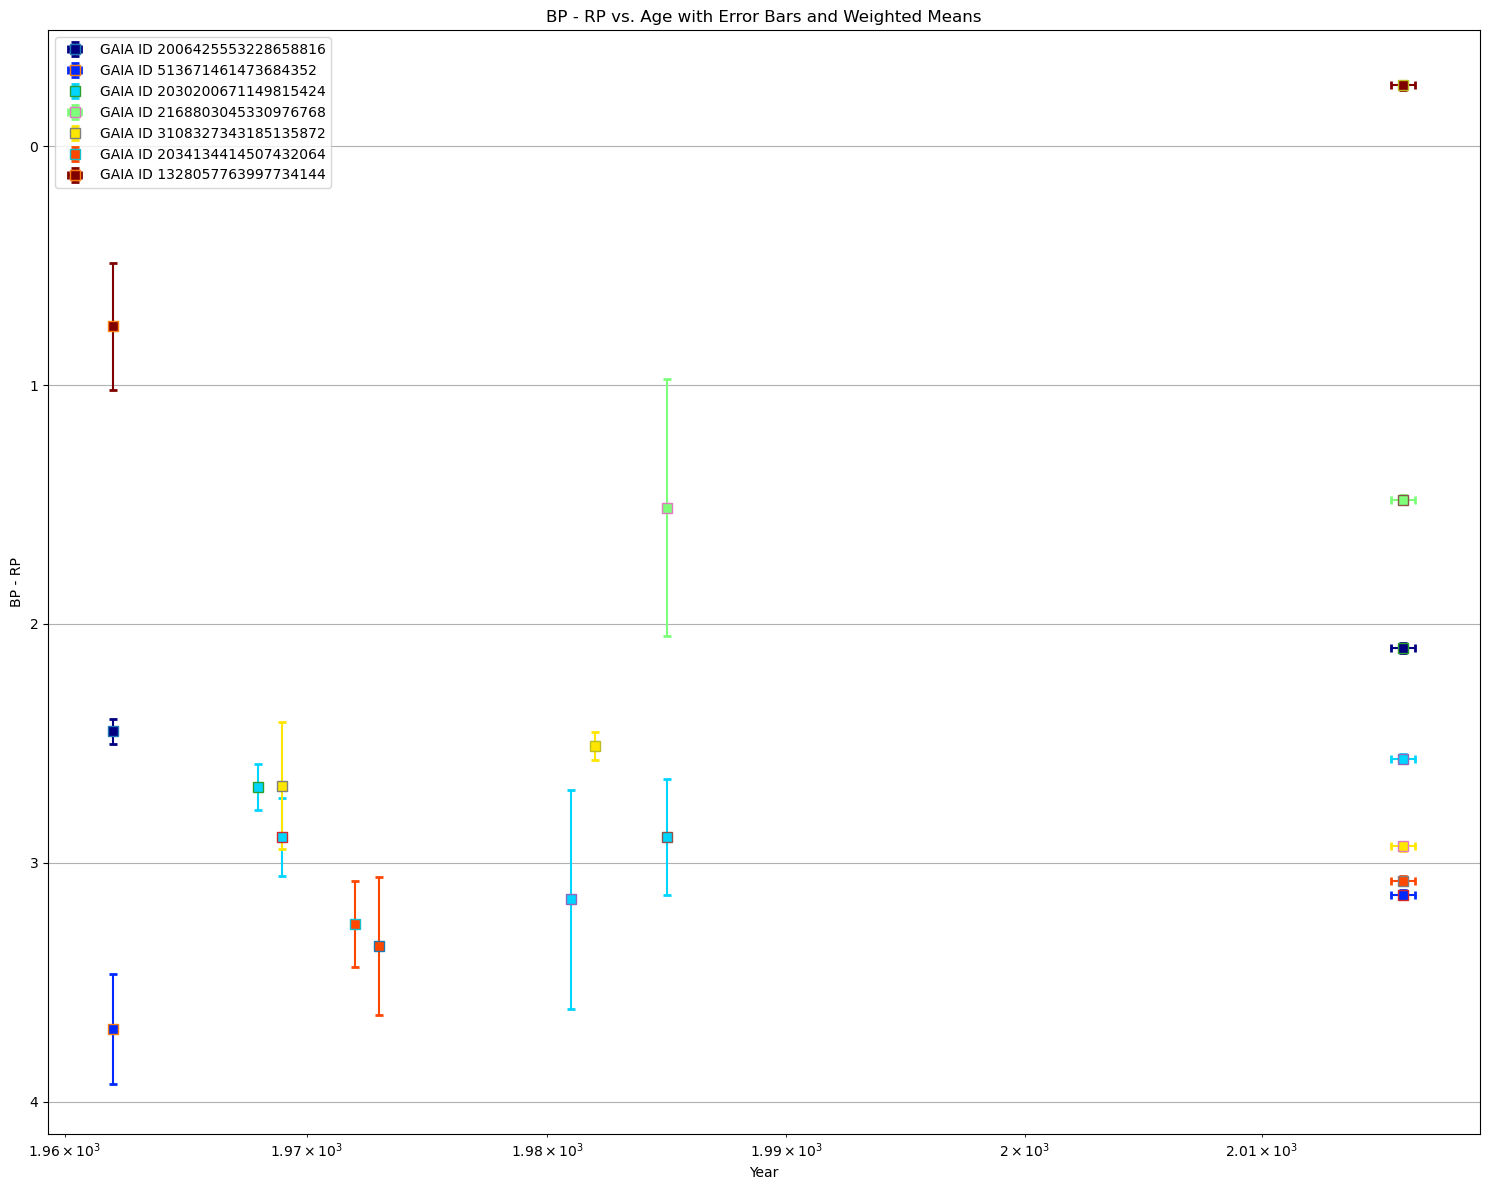

In [498]:
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict
import matplotlib.cm as cm
import logging

# Configure logging
logging.basicConfig(filename='output_log.txt', level=logging.INFO, format='%(asctime)s - %(message)s')

# Function to read GAIA data
def read_gaia_data(file_path, gaia_id_to_process):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        for line in lines[1:]:
            columns = line.strip().split()
            if columns[0] == str(gaia_id_to_process):
                bp_rp = float(columns[4])
                Bmag = float(columns[1])
                Rmag = float(columns[2])
                return bp_rp, Bmag, Rmag
    raise ValueError("GAIA ID not found in the file")

# Function to calculate weighted mean and error
def weighted_mean(values, errors):
    weights = 1 / np.square(errors)
    mean = np.sum(values * weights) / np.sum(weights)
    error = np.sqrt(1 / np.sum(weights))
    return mean, error

# Function to read JSON file and extract data
def extract_data(json_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    
    BP_values = []
    RP_values = []
    ages = []
    max_natmag_errors = []
    max_color_term_errors = []
    gaia_ids = []
    
    for gaia_id, entries in data.items():
        for entry in entries:
            BP = entry['B']
            RP = entry['V']
            BP_values.append(BP)
            RP_values.append(RP)
            gaia_ids.append(gaia_id)
            
            date_str = entry['average_date']
            if date_str:
                age = datetime.strptime(date_str, '%Y-%m-%d').year
                ages.append(age)
                
                natmag_error_1 = entry['natmag_error_1']
                natmag_error_2 = entry['natmag_error_2']
                color_term_error_1 = entry['color_term_error_1']
                color_term_error_2 = entry['color_term_error_2']
                
                max_natmag_error = np.sqrt(natmag_error_1**2 + natmag_error_2**2)
                max_color_term_error = np.sqrt(color_term_error_1**2 + color_term_error_2**2)
                
                max_natmag_errors.append(max_natmag_error)
                max_color_term_errors.append(max_color_term_error)
    
    return np.array(BP_values), np.array(RP_values), np.array(ages), np.array(max_natmag_errors), np.array(max_color_term_errors), gaia_ids

# Load data from JSON file
json_file_path = 'color_natmag_cross4.json'
BP_values, RP_values, ages, max_natmag_errors, max_color_term_errors, gaia_ids = extract_data(json_file_path)
errors = np.sqrt(max_color_term_errors**2 + max_natmag_errors**2)

# Dictionary to store data by GAIA ID
data_by_gaia_id = defaultdict(list)

for BP, RP, age, error, gaia_id in zip(BP_values, RP_values, ages, errors, gaia_ids):
    data_by_gaia_id[gaia_id].append((age, BP - RP, error))

# Assign colors based on unique GAIA IDs
unique_gaia_ids = list(data_by_gaia_id.keys())
color_map = {gaia_id: color for gaia_id, color in zip(unique_gaia_ids, plt.cm.jet(np.linspace(0, 1, len(unique_gaia_ids))))}

# Set to keep track of used labels
used_labels = set()

# Plot each GAIA ID with different color
plt.figure(figsize=(15, 12))

for gaia_id, values in data_by_gaia_id.items():
    # Group values by year if they span multiple years
    years = [value[0] for value in values]
    if len(set(years)) > 1:  # Check if there are multiple unique years
        values_by_year = defaultdict(list)
        for age, bp_rp, error in values:
            values_by_year[age].append((bp_rp, error))
        
        for year, year_values in values_by_year.items():
            bp_rp_values, errors = zip(*year_values)
            
            # Calculate weighted mean
            mean_bp_rp, mean_error = weighted_mean(bp_rp_values, errors)
            label = f'GAIA ID {gaia_id}' if gaia_id not in used_labels else ""
            plt.errorbar(year, mean_bp_rp, yerr=mean_error, fmt='s', ecolor=color_map[gaia_id], capthick=2, capsize=3, markersize=7, markerfacecolor=color_map[gaia_id], label=label)
            used_labels.add(gaia_id)
            logging.info(f'GAIA ID {gaia_id}, Year {year}, Mean BP-RP {mean_bp_rp}, Error {mean_error}')
    else:  # If data does not span multiple years, process as it is
        ages, bp_rp_values, errors = zip(*values)
        
        # Calculate weighted mean
        mean_bp_rp, mean_error = weighted_mean(bp_rp_values, errors)
        if len(ages) > 1:
            mean_age, age_error = np.mean(ages), np.std(ages, ddof=1)
        else:
            mean_age, age_error = np.mean(ages), np.std(ages, ddof=0)
        
        label = f'GAIA ID {gaia_id}' if gaia_id not in used_labels else ""
        plt.errorbar(mean_age, mean_bp_rp, xerr=age_error, yerr=mean_error, fmt='s', ecolor=color_map[gaia_id], capthick=2, capsize=3, markersize=7, markerfacecolor=color_map[gaia_id], label=label)
        used_labels.add(gaia_id)
        logging.info(f'GAIA ID {gaia_id}, Mean Age {mean_age}, Mean BP-RP {mean_bp_rp}, Age Error {age_error}, Error {mean_error}')

# Read and plot GAIA data for all IDs
gaia_file_path = 'GAIA_Bp_Rp.txt'

for gaia_id in unique_gaia_ids:
    gaia_bp_rp, gaia_b, gaia_r = read_gaia_data(gaia_file_path, gaia_id)
    
    # GAIA data and errors
    gaia_date = 2016
    gaia_age_error = 0.5
    gaia_bp_rp_error = 0.02
    
    # Plot GAIA data with a unique color
    label = f'GAIA ID {gaia_id}' if gaia_id not in used_labels else ""
    plt.errorbar(gaia_date, gaia_bp_rp, xerr=gaia_age_error, yerr=gaia_bp_rp_error, fmt='s', ecolor=color_map[gaia_id], capthick=2, capsize=3, markersize=7, markerfacecolor=color_map[gaia_id], label=label)
    used_labels.add(gaia_id)
    logging.info(f'GAIA ID {gaia_id}, GAIA BP-RP {gaia_bp_rp}, GAIA Date {gaia_date}, GAIA Age Error {gaia_age_error}, GAIA BP-RP Error {gaia_bp_rp_error}')

# Formatting the plot
plt.gca().invert_yaxis()
plt.xscale("log")
plt.xlabel('Year')
plt.ylabel('BP - RP')
plt.title('BP - RP vs. Age with Error Bars and Weighted Means')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot to a file
plt.savefig('age_vs_bp_rp.png')

# Show the plot
plt.show()

In [479]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Example GAIA BP and RP magnitudes for 1962 and 2016
# BP_1962 = 11.953  # example value for BP magnitude in 1962
# RP_1962 = 11.198  # example value for RP magnitude in 1962
# BP_2016 = 12.986  # example value for BP magnitude in 2016
# RP_2016 = 13.241  # example value for RP magnitude in 2016

# # Calculate the color indices
# color_index_1962 = BP_1962 - RP_1962
# color_index_2016 = BP_2016 - RP_2016

# # Empirical relation coefficients for BP-RP (example coefficients, need actual data for precision)
# # Using example coefficients similar to B-V relation for simplicity:
# a = 3.988
# b = 0.881

# # Estimate the temperatures
# temperature_log_1962 = a - b * color_index_1962
# temperature_1962 = 10**temperature_log_1962

# temperature_log_2016 = a - b * color_index_2016
# temperature_2016 = 10**temperature_log_2016

# # Print the results
# print(f"Color Index (BP-RP) 1962: {color_index_1962}")
# print(f"Estimated Temperature 1962: {temperature_1962:.2f} K")
# print(f"Color Index (BP-RP) 2016: {color_index_2016}")
# print(f"Estimated Temperature 2016: {temperature_2016:.2f} K")

# # # Plot on H-R diagram (approximated)
# # temperatures = np.linspace(3000, 10000, 500)
# # luminosities = (temperatures / 5778) ** 4

# # plt.figure(figsize=(10, 8))
# # plt.plot(temperatures, luminosities, color='gray', linestyle='--', label='Main Sequence')

# # Plot the star data
# plt.scatter([temperature_1962, temperature_2016], 
#             [luminosities[np.argmin(np.abs(temperatures - temperature_1962))], 
#              luminosities[np.argmin(np.abs(temperatures - temperature_2016))]], 
#             color=['blue', 'red'], label=['1962', '2016'])

# plt.gca().invert_xaxis()
# plt.yscale('log')
# plt.xlabel('Temperature (K)')
# plt.ylabel('Luminosity (Solar units)')
# plt.title('Hertzsprung-Russell Diagram')
# plt.legend()
# plt.grid(True)
# plt.show()

## Section 2
To identify any long-term trend or variability in the star's flux, we can plot a time series of intrinsic colours and get a Fourier transformation to estimate the fluctuation.

In [314]:
# gaia_ids_to_process = ['2060806470651334912', '2006425553228658816', '513671461473684352', '2030200671149815424', '2168803045330976768', '2030200671149815424', '3108327343185135872', '2034134414507432064', '2015785313459952128', '1328057763997734144'] 

In [315]:
# len(gaia_ids_to_process)

10

In [499]:
import json
import csv
from datetime import datetime
import math
import numpy as np

# Load the CSV file and create a dictionary mapping plate IDs to dates
plate_date_map = {}
# with open('Hamburger_Sternwarte.csv', newline='') as csvfile:
with open('combined.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        plate_id = int(row['plate_id'])
        date_orig = datetime.strptime(row['date_orig'], '%Y-%m-%d')
        plate_date_map[plate_id] = date_orig

# Load the JSON file
with open('color_natmag_cross11.json', 'r') as f:
    file1_data = json.load(f)

# Function to check for NaN or null values
def is_invalid_entry(entry, natmag_key, natmag_error_key):
    natmag = entry.get(natmag_key)
    natmag_error = entry.get(natmag_error_key)
    if natmag is None or natmag_error is None:
        return True
    if isinstance(natmag, float) and math.isnan(natmag):
        return True
    if isinstance(natmag_error, float) and math.isnan(natmag_error):
        return True
    return False

# Preprocess to remove entries with NaN or null values in pairs
def preprocess_data(data):
    for gaia_id, plates in data.items():
        to_remove = []

        for i, entry in enumerate(plates):
            if is_invalid_entry(entry, 'natmag_1', 'natmag_error_1') or is_invalid_entry(entry, 'natmag_2', 'natmag_error_2'):
                to_remove.append(i)

        for index in sorted(to_remove, reverse=True):
            del plates[index]

    return data

# Preprocess the data
file1_data = preprocess_data(file1_data)

# Define the date range
start_date = datetime(1929, 1, 1)
end_date = datetime(1999, 12, 31)

# Function to filter plates by date
def filter_plates_by_date(plates, plate_date_map, start_date, end_date):
    filtered_plates = []
    for plate in plates:
        plate_id_1 = plate.get('plate_id_1')
        plate_id_2 = plate.get('plate_id_2')
        
        if plate_id_1 in plate_date_map and plate_id_2 in plate_date_map:
            date_orig_1 = plate_date_map[plate_id_1]
            date_orig_2 = plate_date_map[plate_id_2]
            
            # Check if dates are within the specified range
            if start_date <= date_orig_1 <= end_date and start_date <= date_orig_2 <= end_date:
                days_gap = abs((date_orig_2 - date_orig_1).days)
                # Check if the total gap is less than 10 days
                if days_gap < 124:
                    plate['date_orig_1'] = date_orig_1.strftime('%Y-%m-%d')
                    plate['date_orig_2'] = date_orig_2.strftime('%Y-%m-%d')
                    plate['days_gap'] = days_gap
                    filtered_plates.append(plate)
    
    return filtered_plates

# Filter plates by date for a specific GAIA ID
gaia_id_to_process = '2030200671149815424'
if gaia_id_to_process in file1_data:
    plates = file1_data[gaia_id_to_process]
    plates = filter_plates_by_date(plates, plate_date_map, start_date, end_date)

# Remove GAIA IDs with zero entries
filtered_data = {}
if plates:
    filtered_data[gaia_id_to_process] = plates

# Function to solve for B and V
def solve_for_B_V(natmag_1, color_1, natmag_2, color_2):
    # Create the coefficient matrix and the constants vector
    A = np.array([[1 + color_1, -color_1],
                  [1 + color_2, -color_2]])
    C = np.array([natmag_1, natmag_2])
    
    try:
        # Solve the system of linear equations
        B, V = np.linalg.solve(A, C)
    except np.linalg.LinAlgError:
        # Handle singular matrix case
        return None, None
    return B, V

# Iterate over each GAIA ID and solve for B and V
results = {}
for gaia_id, plates in filtered_data.items():
    for plate in plates:
        natmag_1 = plate['natmag_1']
        color_term_1 = plate['color_term_1']
        color_term_error_1 = plate['color_term_error_1']
        natmag_2 = plate['natmag_2']
        color_term_2 = plate['color_term_2']
        color_term_error_2 = plate['color_term_error_2']

        # Ensure the difference in color terms
        if np.abs(color_term_1 - color_term_2) > 2 * (color_term_error_1 + color_term_error_2):
            B, V = solve_for_B_V(natmag_1, color_term_1, natmag_2, color_term_2)

            if B is not None and V is not None:
                if gaia_id not in results:
                    results[gaia_id] = []
                plate_data = {
                    'B': B,
                    'V': V,
                    'source_id_1': plate['source_id_1'],
                    'plate_id_1': plate['plate_id_1'],
                    'date_orig_1': plate['date_orig_1'],
                    'emulsion_1': plate['emulsion_1'],
                    'source_id_2': plate['source_id_2'],
                    'plate_id_2': plate['plate_id_2'],
                    'date_orig_2': plate['date_orig_2'],
                    'emulsion_2': plate['emulsion_2'],
                    'days_gap': plate['days_gap'],
                    'color_term_1': color_term_1,
                    'color_term_error_1': plate['color_term_error_1'],
                    'gmag_1': plate.get('gmag_1', 'NaN'),
                    'bp_rp_1': plate.get('bp_rp_1', 'NaN'),
                    'color_term_2': color_term_2,
                    'color_term_error_2': plate['color_term_error_2'],
                    'gmag_2': plate.get('gmag_2', 'NaN'),
                    'bp_rp_2': plate.get('bp_rp_2', 'NaN'),
                    'natmag_1': natmag_1,
                    'natmag_error_1': plate['natmag_error_1'],
                    'natmag_2': natmag_2,
                    'natmag_error_2': plate['natmag_error_2']
                }
                results[gaia_id].append(plate_data)

# Save the results to a new JSON file
with open('one.json', 'w') as f:
    json.dump(results, f, indent=4)

print("B and V values calculated and saved to 'one.json'.")

B and V values calculated and saved to 'one.json'.


In [500]:
import json
from datetime import datetime

# Load the previous results
with open('one.json', 'r') as f:
    data = json.load(f)

# Load the plate_date_map from the CSV file
plate_date_map = {}
# with open('Hamburger_Sternwarte.csv', newline='') as csvfile:
with open('combined.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        plate_id = int(row['plate_id'])
        date_orig = datetime.strptime(row['date_orig'], '%Y-%m-%d')
        plate_date_map[plate_id] = date_orig

# Function to calculate the average date and add it to the entry
def add_dates_and_average_time(entry):
    plate_id_1 = entry['plate_id_1']
    plate_id_2 = entry['plate_id_2']

    date_1 = plate_date_map.get(plate_id_1)
    date_2 = plate_date_map.get(plate_id_2)
    average_date = date_1 + (date_2 - date_1) / 2
    
    # if date_1 and date_2 and abs((date_2 - date_1).days) <= 124:
    #     average_date = date_1 + (date_2 - date_1) / 2
    # else:
    #     average_date = None

    entry['date_orig_1'] = date_1.strftime('%Y-%m-%d') if date_1 else None
    entry['date_orig_2'] = date_2.strftime('%Y-%m-%d') if date_2 else None
    entry['average_date'] = average_date.strftime('%Y-%m-%d') if average_date else None

    return entry

# Process each GAIA ID and add dates and average time
for gaia_id, entries in data.items():
    for entry in entries:
        add_dates_and_average_time(entry)

# Save the updated results to a new JSON file
with open('color_natmag_cross4.json', 'w') as f:
    json.dump(data, f, indent=4)

print("Dates and average times added, and data saved to 'color_natmag_cross4.json'.")

Dates and average times added, and data saved to 'color_natmag_cross4.json'.


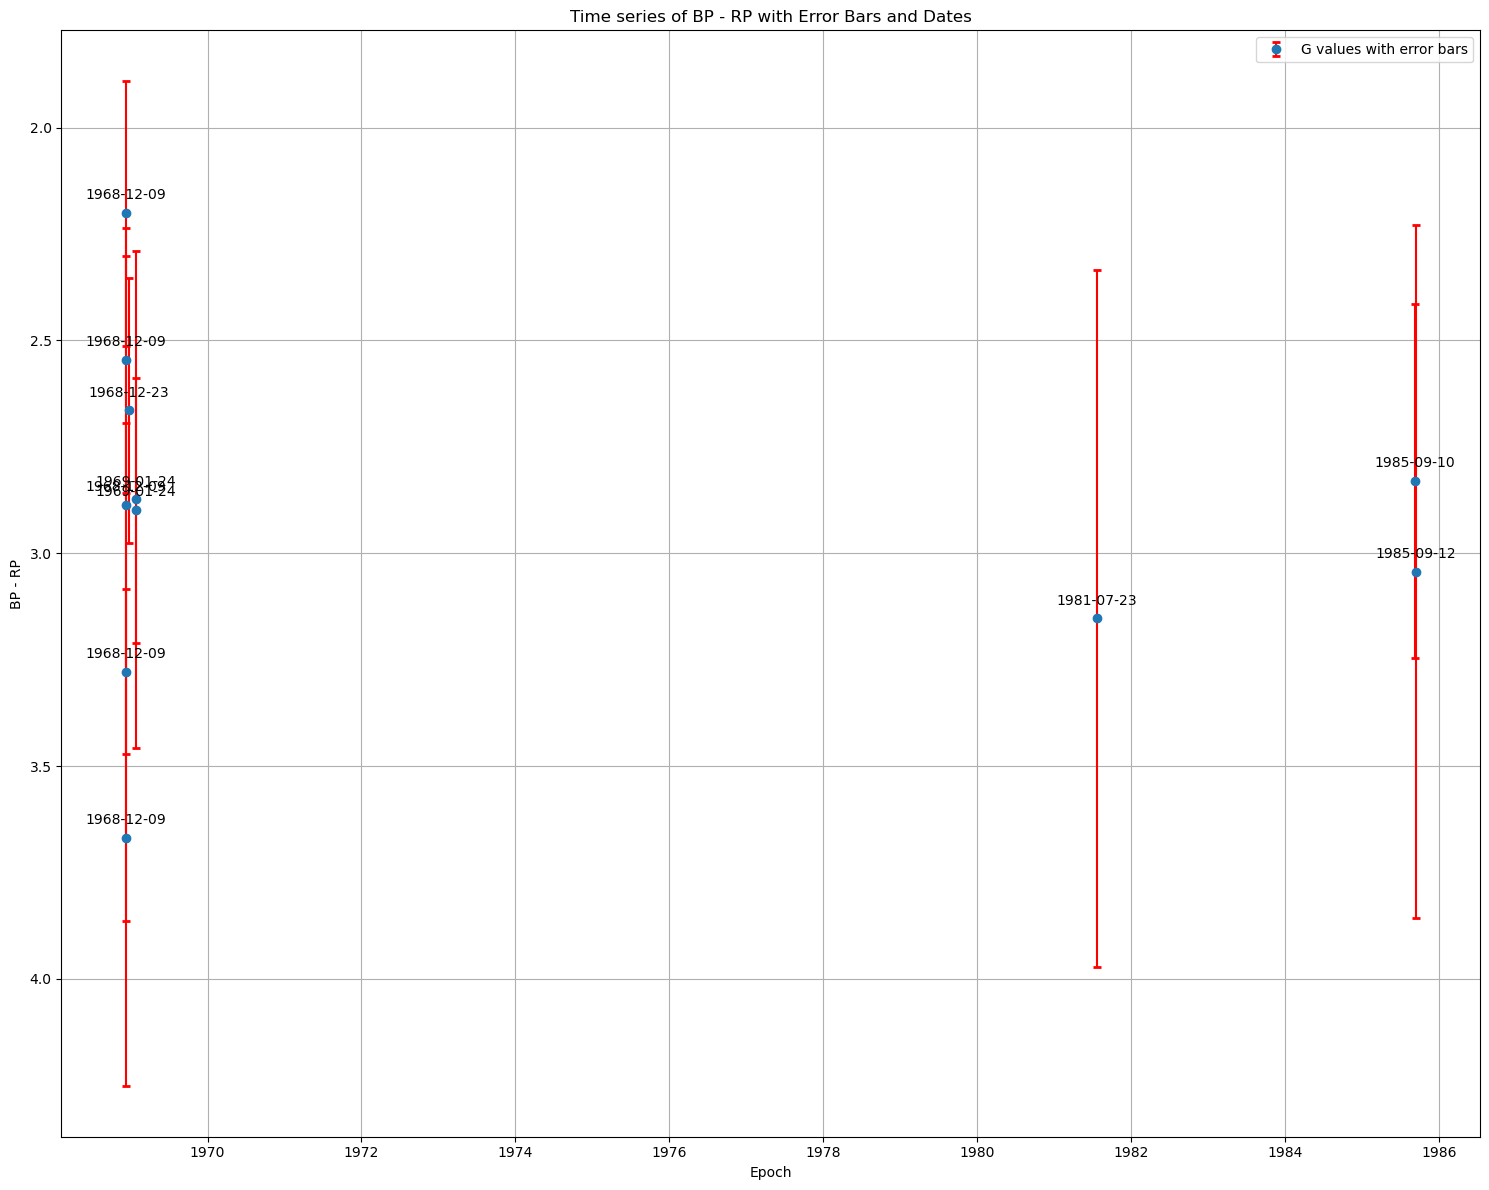

In [501]:
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Function to convert BP and RP to G using Gaia DR3 transformation
def bp_rp_mod(BP, RP, gaia_id_to_process):
    parallax = None
    file_path = 'GAIA_Bp_Rp.txt'  # Replace with the path to your file
    
    # Read the file
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        # Skip the header
        for line in lines[1:]:
            columns = line.strip().split()
            if columns[0] == str(gaia_id_to_process):
                parallax = float(columns[-4])
                # ag_gspphot = float(columns[-2])
                # ebpminrp_gspphot = float(columns[-1])
                break

    if parallax is not None:
        BP_RP = BP - RP
        G = BP + 0.01 * BP_RP
        # return G + 5 * np.log10(parallax) - 10 - ag_gspphot, BP_values, RP_values + ebpminrp_gspphot
        return G + 5 * np.log10(parallax) - 10, BP_values, RP_values
    else:
        raise ValueError("GAIA ID not found in the file")

# Function to read JSON file and extract data
def extract_data(json_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    
    BP_values = []
    RP_values = []
    average_dates = []
    max_natmag_errors = []
    max_color_term_errors = []
    
    for gaia_id, entries in data.items():
        for entry in entries:
            BP = entry['B']
            RP = entry['V']
            BP_values.append(BP)
            RP_values.append(RP)
            
            average_date_str = entry['average_date']
            if average_date_str:
                average_date = datetime.strptime(average_date_str, '%Y-%m-%d')
                average_dates.append(average_date)
                
                natmag_error_1 = entry['natmag_error_1']
                natmag_error_2 = entry['natmag_error_2']
                color_term_error_1 = entry['color_term_error_1']
                color_term_error_2 = entry['color_term_error_2']
                
                max_natmag_error = max(natmag_error_1, natmag_error_2)
                max_color_term_error = max(color_term_error_1, color_term_error_2)
                
                max_natmag_errors.append(max_natmag_error)
                max_color_term_errors.append(max_color_term_error)
    
    return np.array(BP_values), np.array(RP_values), np.array(average_dates), np.array(max_natmag_errors), np.array(max_color_term_errors)

# Load data from JSON file
json_file_path = 'color_natmag_cross4.json'
BP_values, RP_values, average_dates, max_natmag_errors, max_color_term_errors = extract_data(json_file_path)
errors = 1 * (max_color_term_errors + max_natmag_errors)

# Calculate G values
G_values, BP_values, RP_values = bp_rp_mod(BP_values, RP_values, gaia_id_to_process)

# Calculate BP - RP values
BP_minus_RP_values = BP_values - RP_values

# Combine all the data into a single list of tuples for sorting
combined_data = list(zip(BP_minus_RP_values, G_values, average_dates, errors))

# Filter out points where average_date is None
filtered_data = [entry for entry in combined_data if entry[2] is not None]

# Unpack the filtered data
BP_minus_RP_sorted, G_sorted, dates_sorted, errors_sorted = zip(*filtered_data)

# Plot the data with error bars
plt.figure(figsize=(15, 12))
plt.errorbar(dates_sorted, BP_minus_RP_sorted, yerr=errors_sorted, fmt='o', ecolor='r', capthick=2, capsize=3, label='G values with error bars')

# Annotate points with their average dates
for i, date in enumerate(dates_sorted):
    plt.annotate(date.strftime('%Y-%m-%d'), (dates_sorted[i], BP_minus_RP_sorted[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Formatting the plot
plt.gca().invert_yaxis()
# plt.xscale("log")
plt.ylabel('BP - RP')
plt.xlabel('Epoch')
plt.title('Time series of BP - RP with Error Bars and Dates')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot to a file
plt.savefig(f'BP_minus_RP_Timeseries_{gaia_id_to_process}.png')

# Show the plot
plt.show()

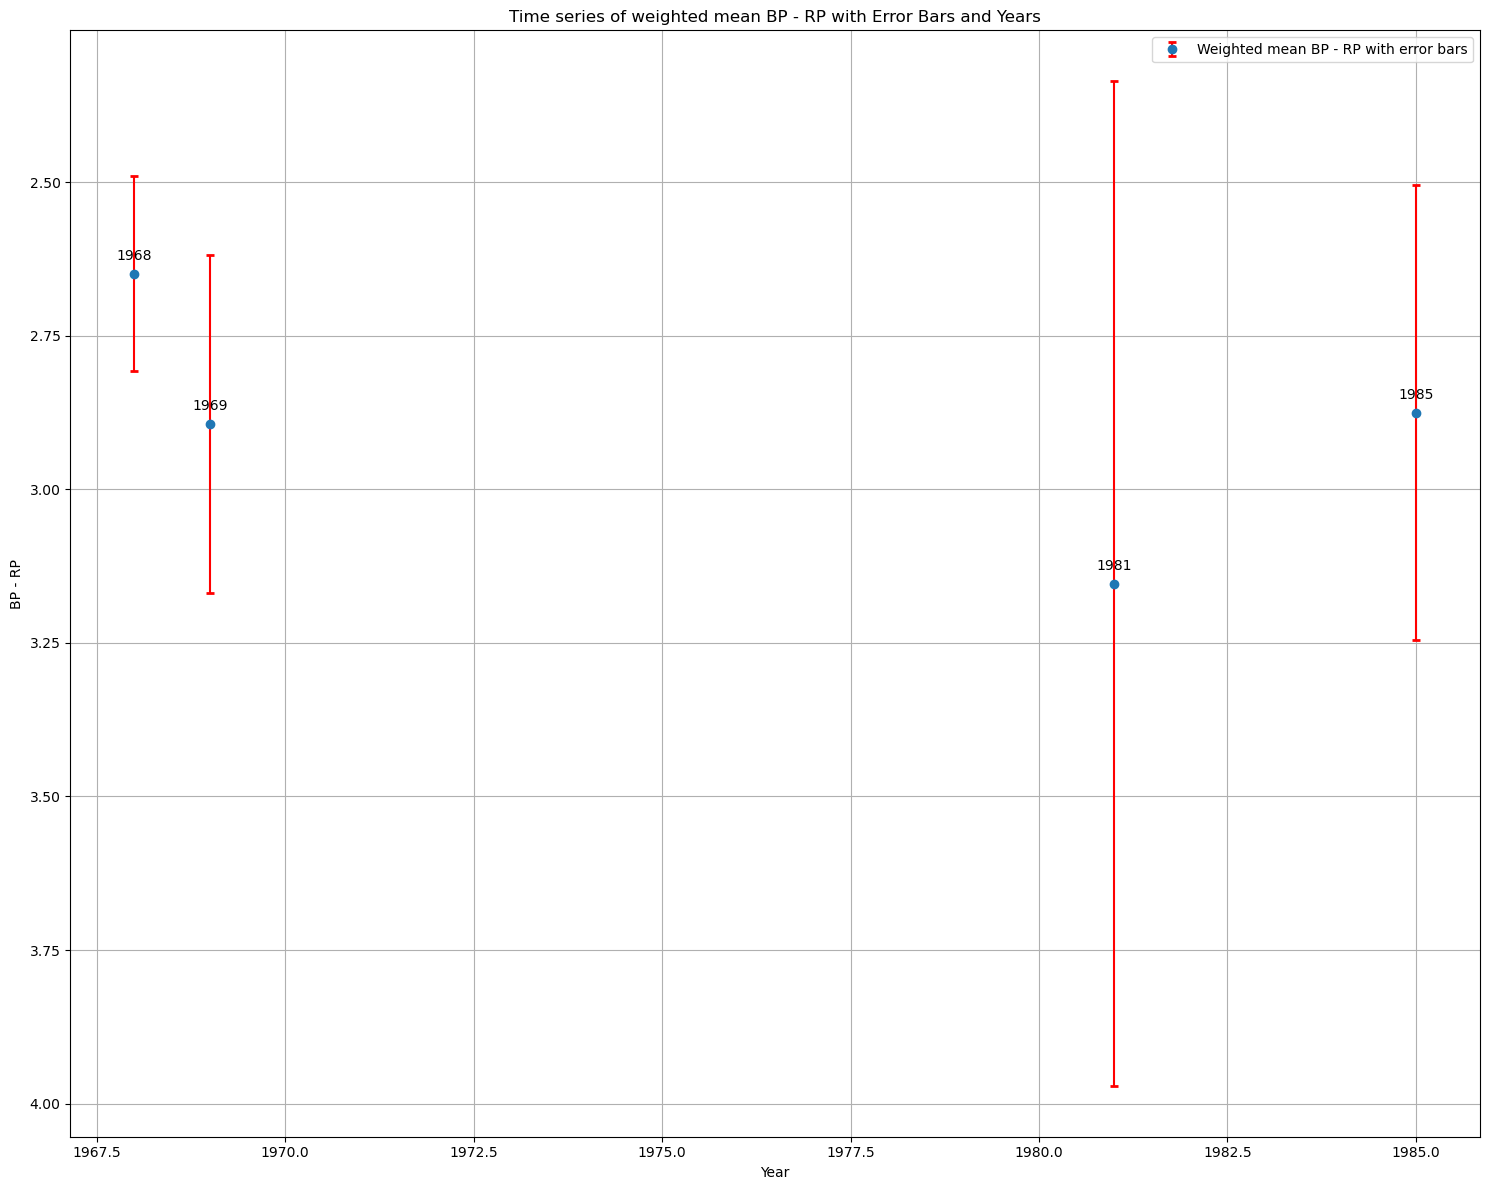

In [504]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Group data by year
data_by_year = defaultdict(list)

for bp_rp, g, date, error in zip(BP_minus_RP_sorted, G_sorted, dates_sorted, errors_sorted):
    year = date.year
    data_by_year[year].append((bp_rp, error))

# Function to calculate weighted mean and error
def weighted_mean(values, errors):
    weights = 1 / np.square(errors)
    mean = np.sum(values * weights) / np.sum(weights)
    error = np.sqrt(1 / np.sum(weights))
    return mean, error

# Calculate weighted means and errors for each year
years = []
weighted_means = []
weighted_errors = []

for year, values in data_by_year.items():
    bp_rp_values, errors = zip(*values)
    mean_bp_rp, mean_error = weighted_mean(bp_rp_values, errors)
    years.append(year)
    weighted_means.append(mean_bp_rp)
    weighted_errors.append(mean_error)

# Convert lists to arrays for plotting
years = np.array(years)
weighted_means = np.array(weighted_means)
weighted_errors = np.array(weighted_errors)

# Plot the data with error bars
plt.figure(figsize=(15, 12))
plt.errorbar(years, weighted_means, yerr=weighted_errors, fmt='o', ecolor='r', capthick=2, capsize=3, label='Weighted mean BP - RP with error bars')

# Annotate points with their years
for i, year in enumerate(years):
    plt.annotate(str(year), (years[i], weighted_means[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Formatting the plot
plt.gca().invert_yaxis()
plt.ylabel('BP - RP')
plt.xlabel('Year')
plt.title('Time series of weighted mean BP - RP with Error Bars and Years')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot to a file
# plt.savefig('G_values_vs_BP_minus_RP_weighted_means.png')

# Show the plot
plt.show()

/home/dutta/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dutta/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


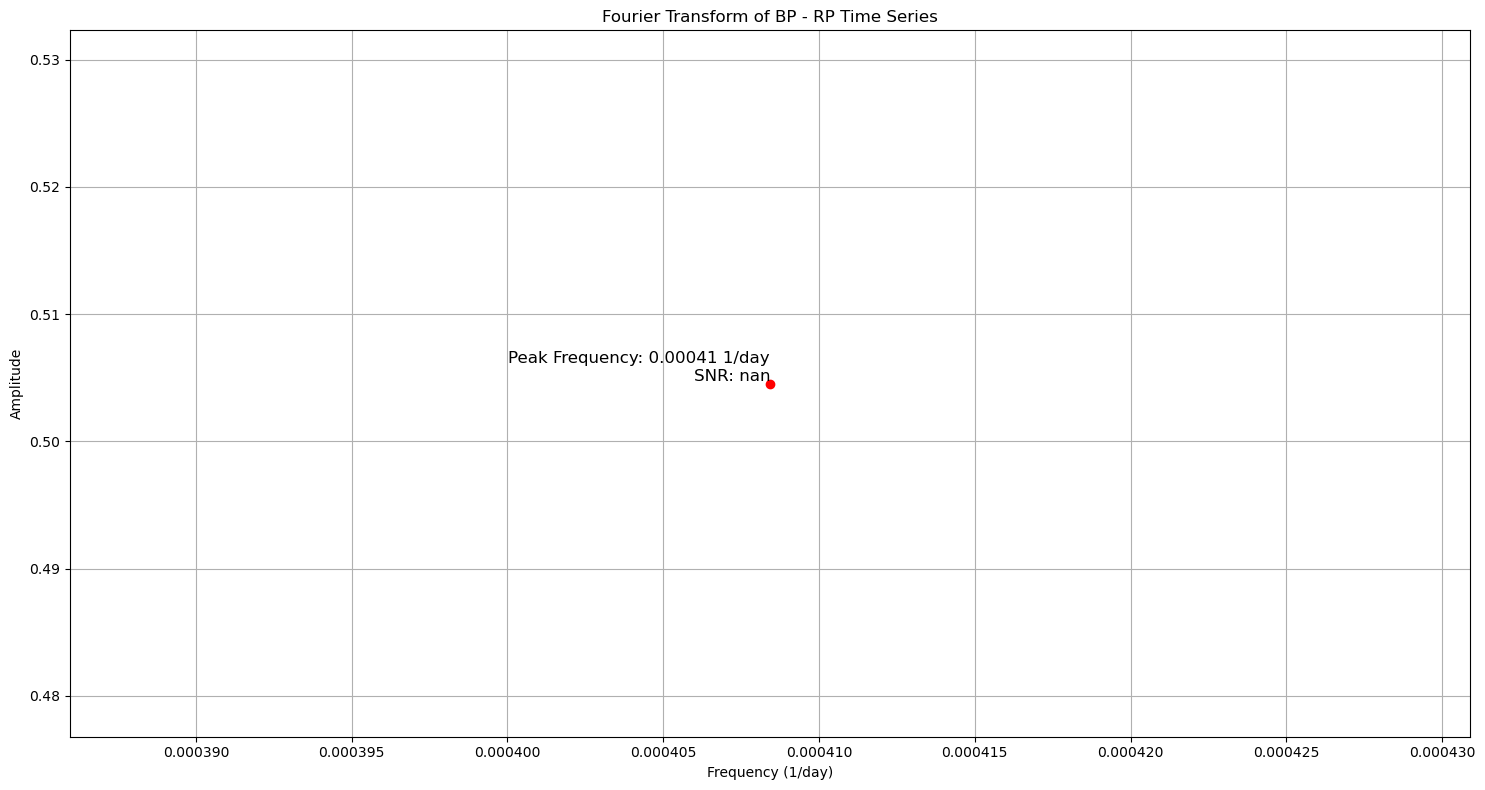

Peak Frequency: 0.00041 1/day
Signal-to-Noise Ratio (SNR): nan


In [505]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

# Convert dates to ordinal numbers for Fourier Transform
date_ordinals = np.array([date.toordinal() for date in dates_sorted])

# Compute the time intervals (in days)
time_intervals = date_ordinals - date_ordinals.min()

# Subtract the mean from the weighted means to center the data (important for FFT)
centered_means = np.array(weighted_means) - np.mean(weighted_means)

# Perform the Fourier Transform
yf = fft(centered_means)
xf = fftfreq(len(centered_means), np.mean(np.diff(time_intervals)))

# Only plot the positive half of the spectrum (real part)
half_n = len(xf) // 2
positive_xf = xf[1:half_n]
positive_yf = np.abs(yf[1:half_n])

# Identify the peak frequency and its amplitude
peak_index = np.argmax(positive_yf)
peak_frequency = positive_xf[peak_index]
peak_amplitude = positive_yf[peak_index]

# Estimate noise level (mean amplitude of non-peak frequencies)
noise_amplitude = np.mean(np.delete(positive_yf, peak_index))

# Calculate SNR
snr = peak_amplitude / noise_amplitude

# Plot the Fourier Transform results
plt.figure(figsize=(15, 8))
plt.plot(positive_xf, positive_yf)
plt.scatter([peak_frequency], [peak_amplitude], color='red')  # Highlight peak frequency
plt.text(peak_frequency, peak_amplitude, f'Peak Frequency: {peak_frequency:.5f} 1/day\nSNR: {snr:.5f}', 
         fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('Frequency (1/day)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of BP - RP Time Series')
plt.grid(True)
plt.tight_layout()

# Save the plot to a file
plt.savefig(f'fourier_transform_bp_rp_{gaia_id_to_process}.png')

# Show the plot
plt.show()

print(f'Peak Frequency: {peak_frequency:.5f} 1/day')
print(f'Signal-to-Noise Ratio (SNR): {snr:.5f}')

## Section 3
For each selected GAIA ids, we can one-by-one plot the Age Vs bp-rp, bp and rp plots for comparison.

Needs to be run in order!

In [476]:
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.ticker as ticker

# Define a custom formatter for the x-axis to display years
def year_formatter(x, pos):
    return f'{int(x)}'

# Function to calculate weighted mean and error
def weighted_mean(values, errors):
    weights = 1 / np.square(errors)
    mean = np.sum(values * weights) / np.sum(weights)
    error = np.sqrt(1 / np.sum(weights))
    return mean, error

# Function to read GAIA data
def read_gaia_data(file_path, gaia_id_to_process):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        for line in lines[1:]:
            columns = line.strip().split()
            if columns[0] == str(gaia_id_to_process):
                bp_rp = float(columns[4])
                Bmag = float(columns[1])
                Rmag = float(columns[2])
                return bp_rp, Bmag, Rmag
    raise ValueError("GAIA ID not found in the file")

# Function to read JSON file and extract data
def extract_data(json_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    
    BP_values = []
    RP_values = []
    average_dates = []
    max_natmag_errors = []
    max_color_term_errors = []
    
    for gaia_id, entries in data.items():
        for entry in entries:
            BP = entry['B']
            RP = entry['V']
            BP_values.append(BP)
            RP_values.append(RP)
            
            average_date_str = entry['average_date']
            if average_date_str:
                average_date = datetime.strptime(average_date_str, '%Y-%m-%d')
                average_dates.append(average_date)
                
                natmag_error_1 = entry['natmag_error_1']
                natmag_error_2 = entry['natmag_error_2']
                color_term_error_1 = entry['color_term_error_1']
                color_term_error_2 = entry['color_term_error_2']
                
                max_natmag_error = np.sqrt(natmag_error_1**2 + natmag_error_2**2)
                max_color_term_error = np.sqrt(color_term_error_1**2 + color_term_error_2**2)
                
                max_natmag_errors.append(max_natmag_error)
                max_color_term_errors.append(max_color_term_error)
    
    return np.array(BP_values), np.array(RP_values), np.array(average_dates), np.array(max_natmag_errors), np.array(max_color_term_errors)

# Function to plot time series
def plot_time_series(x, y, yerr, y_label, title, file_name, gaia_value=None, gaia_yerr=None):
    plt.figure(figsize=(10, 8))
    plt.errorbar(x, y, xerr=age_errors, yerr=yerr, fmt='o', ecolor='b', capthick=2, label='Data points')

    if gaia_value is not None:
        # GAIA data point
        plt.errorbar(gaia_date, gaia_value, xerr=gaia_age_error, yerr=gaia_yerr, fmt='ro', capthick=2, capsize=5, label='GAIA DR3 (2015.5)')

    plt.gca().invert_yaxis()
    plt.xscale("log")

    # # Apply the custom formatter to the x-axis
    # ax = plt.gca()
    # ax.xaxis.set_major_formatter(ticker.FuncFormatter(year_formatter))

    plt.xlabel('Age (years)')
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Save the plot to a file
    plt.savefig(file_name)
    plt.close()

# Load data from JSON file
json_file_path = 'color_natmag_cross4.json'
BP_values, RP_values, average_dates, max_natmag_errors, max_color_term_errors = extract_data(json_file_path)

# Calculate errors
errors = np.sqrt(max_color_term_errors**2 + max_natmag_errors**2)
BP_errors = np.sqrt((max_color_term_errors/2)**2 + (max_natmag_errors/2)**2)
RP_errors = np.sqrt((max_color_term_errors/2)**2 + (max_natmag_errors/2)**2)

# GAIA data and errors
gaia_date = 2015.5
gaia_age_error = 1.0
gaia_bp_rp_error = 0.02
gaia_bp_error = 0.015
gaia_rp_error = 0.015

# Read GAIA data
gaia_file_path = 'GAIA_Bp_Rp.txt'
gaia_bp_rp, gaia_b, gaia_r = read_gaia_data(gaia_file_path, gaia_id_to_process)

# Convert dates to numerical format (year fraction)
ages_sorted = np.array([date.year + date.timetuple().tm_yday / 365.25 for date in average_dates])

# General age error for all points
age_errors = np.std(ages_sorted)

# Calculate BP - RP values
BP_minus_RP_values = np.array(BP_values) - np.array(RP_values)

# Combine all the data into a single list of tuples for sorting
combined_data = list(zip(BP_minus_RP_values, ages_sorted, errors))

# Filter out points where age is None
filtered_data = [entry for entry in combined_data if entry[1] is not None]

# Unpack the filtered data
BP_minus_RP_sorted, ages_sorted, errors_sorted = zip(*filtered_data)

# Convert to numpy arrays for mean calculation
ages_sorted = np.array(ages_sorted)
errors_sorted = np.array(errors_sorted)

# Calculate weighted mean and error for BP - RP values
bp_rp_mean, bp_rp_mean_error = weighted_mean(np.array(BP_minus_RP_sorted), np.array(errors_sorted))

# Plot BP-RP vs Age
plt.figure(figsize=(10, 8))
plt.errorbar(ages_sorted, BP_minus_RP_sorted, xerr=age_errors/len(ages_sorted), yerr=errors_sorted, fmt='o', ecolor='b', capthick=2, label='Data points')
plt.errorbar(gaia_date, gaia_bp_rp, xerr=gaia_age_error, yerr=gaia_bp_rp_error, fmt='ro', capthick=2, capsize=5, label='GAIA DR3 (2015.5)')
plt.errorbar(ages_sorted.mean(), bp_rp_mean, xerr=age_errors.mean(), yerr=bp_rp_mean_error, fmt='mo', capthick=2, capsize=5, label='Weighted Mean BP - RP')

plt.gca().invert_yaxis()
plt.xscale("log")

# # Apply the custom formatter to the x-axis
# ax = plt.gca()
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(year_formatter))

plt.xlabel('Age (years)')
plt.ylabel('BP - RP')
plt.title(f'BP - RP vs. Age for GAIA ID {gaia_id_to_process}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f'BP_minus_RP_vs_Age_{gaia_id_to_process}.png')
plt.close()

# Plot B values vs Age
plot_time_series(ages_sorted, BP_values, BP_errors, 'B Value', f'B Value vs. Age for GAIA ID {gaia_id_to_process}', f'B_values_vs_Age_{gaia_id_to_process}.png', gaia_value=gaia_b, gaia_yerr=gaia_bp_error)

# Plot V values vs Age
plot_time_series(ages_sorted, RP_values, RP_errors, 'V Value', f'V Value vs. Age for GAIA ID {gaia_id_to_process}', f'V_values_vs_Age_{gaia_id_to_process}.png', gaia_value=gaia_r, gaia_yerr=gaia_rp_error)

print(weighted_mean(BP_values, BP_errors), weighted_mean(RP_values, RP_errors))
print(f"Plots saved with GAIA ID {gaia_id_to_process} in the filenames.")

(11.952848052466683, 0.13285622598126492) (11.19808867185182, 0.13285622598126492)
Plots saved with GAIA ID 1328057763997734144 in the filenames.


In [485]:
# import matplotlib.pyplot as plt
# import numpy as np
# from datetime import datetime

# # Function to calculate weighted mean and error
# def weighted_mean(values, errors):
#     weights = 1 / np.square(errors)
#     mean = np.sum(values * weights) / np.sum(weights)
#     error = np.sqrt(1 / np.sum(weights))
#     return mean, error

# # Unpack the filtered data
# BP_minus_RP_sorted, G_sorted, dates_sorted, errors_sorted = zip(*filtered_data)

# # Convert to numpy arrays
# BP_minus_RP_sorted = np.array(BP_minus_RP_sorted)
# G_sorted = np.array(G_sorted)
# errors_sorted = np.array(errors_sorted)

# # Calculate the weighted average and error for BP_minus_RP and G values
# BP_minus_RP_avg, BP_minus_RP_err = weighted_mean(BP_minus_RP_sorted, errors_sorted)
# G_avg, G_err = weighted_mean(G_sorted, errors_sorted)

# # Plot the data with error bars
# plt.figure(figsize=(10, 8))
# plt.errorbar(BP_minus_RP_sorted, G_sorted, xerr=errors_sorted, yerr=errors_sorted, fmt='o', ecolor='b', capthick=2, label='G values with error bars')

# # Plot the average point with error bars
# plt.errorbar(BP_minus_RP_avg, G_avg, xerr=BP_minus_RP_err, yerr=G_err, fmt='o', ecolor='r', capthick=2, capsize=5, label='Weighted Average G with error')

# # Annotate the average point with the year range
# year_range = f"{min(dates_sorted).year}-{max(dates_sorted).year}"
# plt.annotate(year_range, (BP_minus_RP_avg, G_avg), textcoords="offset points", xytext=(0,10), ha='center')

# # GAIA
# def plot_bp_rp_mg(gaia_id_to_process):
#     file_path = 'GAIA_Bp_Rp.txt'  # Replace with the path to your file
#     bp_rp = None
#     mg = None

#     # Read the file
#     with open(file_path, 'r') as file:
#         lines = file.readlines()
        
#         # Skip the header
#         for line in lines[1:]:
#             columns = line.strip().split()
#             if columns[0] == str(gaia_id_to_process):
#                 bp_rp = float(columns[4])
#                 mg = float(columns[3])
#                 break

#     if bp_rp is not None and mg is not None:
#         plt.plot(bp_rp, mg, 'ro', label='GAIA DR3')
#     else:
#         raise ValueError("GAIA ID not found in the file")

# # Formatting the plot
# plot_bp_rp_mg(gaia_id_to_process)
# plt.gca().invert_yaxis()
# plt.xlabel('BP - RP')
# plt.ylabel('G Value')
# plt.title('G Values vs. BP - RP with Error Bars and Weighted Average')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()

# # Save the plot to a file
# # plt.savefig('G_values_vs_BP_minus_RP.png')

# # Show the plot
# plt.show()